# Тест Прогнозирование временных рядов

In [8]:
import pandas as pd
import statsmodels.api as sm

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

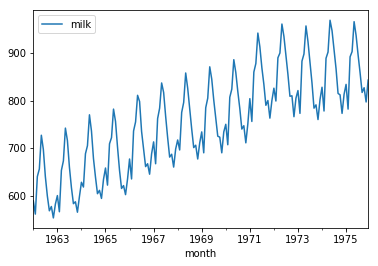

In [11]:
milk.plot()

In [12]:
# критерий Дики-Фуллера
sm.tsa.stattools.adfuller(milk['milk']) # Нестационарный

(-1.3038115874221281,
 0.62742670860303229,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [13]:
milk.index.days_in_month # сколько дней в месяце по году-индексу (.days_in_month)

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name=u'month', length=168)

In [14]:
# сгенерируем столбец среднедневной надой: месячный поделим на количество дней в месяце
milk['milk_days'] = milk['milk'].values/milk.index.days_in_month

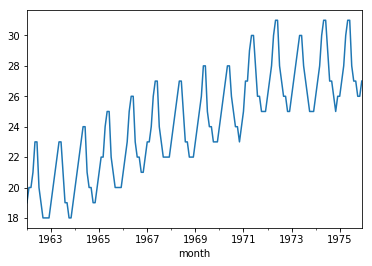

In [15]:
milk['milk_days'].plot()

Дифференцирование

In [16]:
# Дифф единичное
milk.daily_diff_1 = milk.milk_days - milk.milk_days.shift(1) # .shift(1) смещение ячейки

# критерий Дики-Фуллера
sm.tsa.stattools.adfuller(milk.daily_diff_1[1:]) # Есть стационарность

(-3.1996430632040318,
 0.020005349420571864,
 13,
 153,
 {'1%': -3.473829775724492,
  '10%': -2.5769448985432954,
  '5%': -2.8806228997114962},
 230.53730678570236)

In [17]:
# Дифф сезонное
milk.daily_diff_12 = milk.milk_days - milk.milk_days.shift(12) # .shift(12) смещение ячейки на 12 (сезон)

# критерий Дики-Фуллера
sm.tsa.stattools.adfuller(milk.daily_diff_12[12:]) # Нестационарный

(-2.2338165968820616,
 0.19420165222112673,
 13,
 142,
 {'1%': -3.4772616240489951,
  '10%': -2.5777431104939494,
  '5%': -2.8821181874544233},
 193.74044327907896)

Будем дифференцировать сначало сезонно, а затем единично

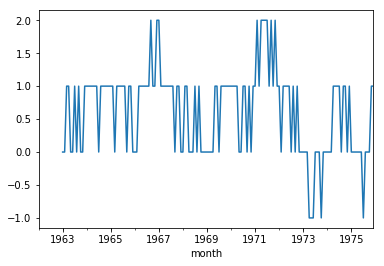

In [18]:
milk.daily_diff_12.plot()

In [26]:
# Дифф единичное
milk.daily_diff_12_1 = milk.daily_diff_12[12:] - milk.daily_diff_12[12:].shift(1) # .shift(1) смещение ячейки

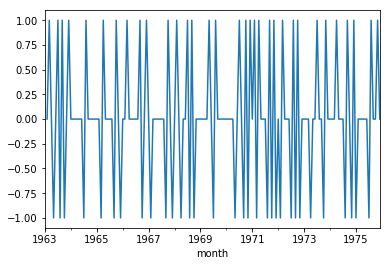

In [29]:
milk.daily_diff_12_1.plot()

In [30]:
# критерий Дики-Фуллера
sm.tsa.stattools.adfuller(milk.daily_diff_12_1[1:]) # Есть стационарность

(-5.2840039412536761,
 5.9092531019097637e-06,
 12,
 142,
 {'1%': -3.4772616240489951,
  '10%': -2.5777431104939494,
  '5%': -2.8821181874544233},
 196.09604896354287)

Автокорреляционная функции (определим q=11,Q=12/12=1)

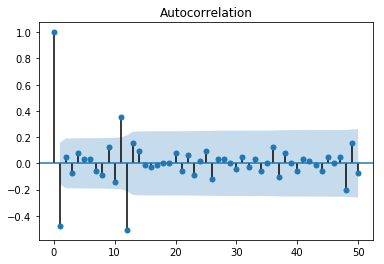

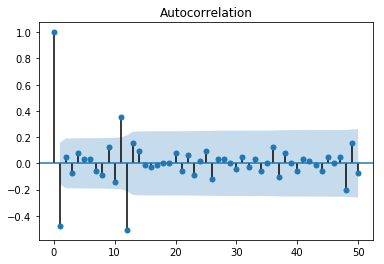

In [36]:
sm.graphics.tsa.plot_acf(milk.daily_diff_12_1[1:].values.squeeze(), lags=50)

Частичная Автокорреляционная функция (определим p=11,P=48/12=4)

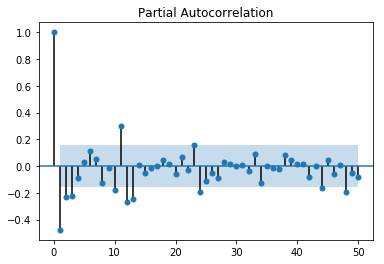

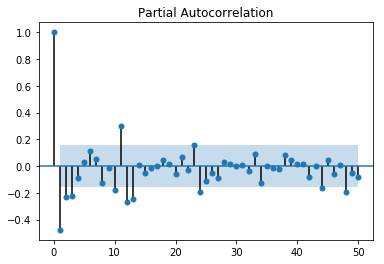

In [37]:
sm.graphics.tsa.plot_pacf(milk.daily_diff_12_1[1:].values.squeeze(), lags=50)